<center>
    
## <font color='maroon'>ASTR 21100/31200</font>
## <font color='maroon'>Computational techniques in astrophysics<br></font>

## <font color='maroon'>Numerical computation of integrals<br></font>
</center>


### <font color='darkblue'>What is integration?

Numerical integration of a function, $f(x,\ldots)$ over a single variable, $x$ (1d integration) over interval $[a,b]$:

$$\int\limits_a^b f(x) dx,$$

is evaluation of the area under $f(x)$, in which regions of $f(x)<0$ contribute negative areas and regions of $f(x)>0$ contribute positive areas. For example, $\int_0^{2\pi}\cos x\,dx = 0$ because it includes equal contributions from the negative and positive values of cosine. 

### <font color='darkblue'>Numerical integration is often called numerical quadrature

<p>
<center>
    
<img width=700 src="https://www.thefamouspeople.com/profiles/images/anaxagoras-4.jpg"></img>

In [4]:
# check using numerical integration
import numpy as np
from matplotlib import pylab as plt
from codes.plotting import plot_prettier

plot_prettier()

### <font color='darkblue'>Numerical integration is often called numerical *quadrature*

The origin of this term goes back to the Greek philosopher/mathematician <a href="https://plato.stanford.edu/entries/anaxagoras/">Anaxagoras</a>, who lived in the 5th century BC and was inprisoned for claiming that the Sun is not a god, but a hot, flowing stone in space and occupied his time in prison trying to solve the problem of finding a side length of a square that had the same area as a circle (i.e. he was trying <a href="https://en.wikipedia.org/wiki/Squaring_the_circle">"to square a circle"</a> - the problem that occupied many mathematicians after Anaxagoras). 

More generally, one can think of computing $\int_a^b f(x)dx$ as finding side lengths of quadrangle that has the same area as the area under the curve $f(x)$ for $x\in [a,b]$. Hence, the term *quadrature* and <tt>QUAD</tt> in the name of <tt>QUADPACK</tt> library. 

If we take one of the quadrangle sides to be $(b-a)$, then the integration is the problem of finding the length of the other side, which can be thought of some sort of weighted average of $f(x)$ over the interval $[a,b]$. 

In the plot below the area of the rectangle is an approximation of the area under the blue curve over the interval $[a,b]=[0,1]$. 

Example: integral of $f(x)=e^x$ over $[a,b]=[0,1]$ 

In [5]:
def quad_illustration(a,b, func=np.exp, nsteps=100, figsize=(3,3)):
    xg = np.linspace(a, b, nsteps) # generate a finer grid of evenly spaced values

    plt.figure(figsize=(3,3))
    plt.xlabel('$x$'); plt.ylabel('$f(x)$')
    plt.plot(xg, func(xg), lw=2., color='indigo') # plot sin(x)
    # fill_between function creates a shaded area
    plt.fill_between(xg, np.zeros_like(xg), func(xg), color='darkslateblue', alpha=0.9) # shade area under sin(x)
    integral = np.average(func(xg))
    # shade area under <f> over [a, b] interval
    plt.fill_between(xg, np.zeros_like(xg), (integral)*np.ones_like(xg), color='slateblue', alpha=0.5)
    plt.show()
    return

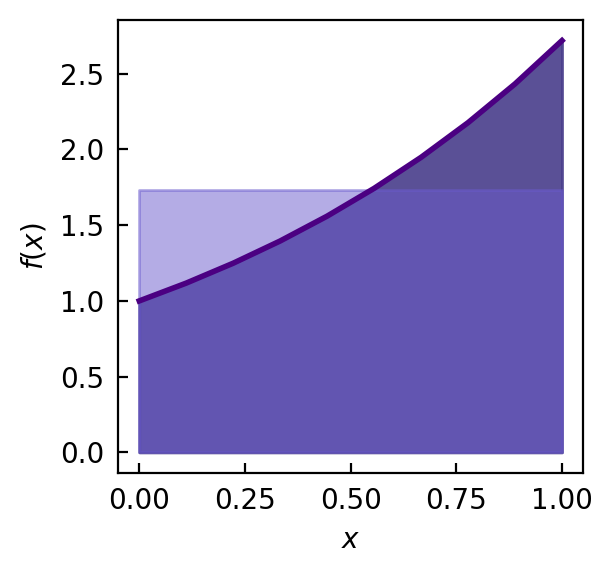

In [6]:
a, b = 0, 1
quad_illustration(a,b, func=np.exp, nsteps=10)

The simplest approach: approximate the integral as area under the rectangle with vertices $[a,0]$, $[a, \bar{f}]$, $[b,\bar{f}]$, $[b,0]$ where 

$$\bar{f}=\frac{1}{N}\,\sum\limits_{i=0}^{N-1}f(x_i)$$
is approximation for the function average over the interval

$$\int_a^b f(x) dx\approx \bar{f}(b-a)=\frac{b-a}{N}\,\sum\limits_{i=0}^{N-1}f(x_i)=h\,\sum\limits_{i=0}^{N-1}f_i.$$

$x_i$ are evenly spaced  $N$ values of the function.

In [7]:
a, b = 0, 1
N = 10000000
xg = np.linspace(a, b, N) # generate a finer grid of evenly spaced values

# integral = average of f(x) * (b-a)
aint = np.average(np.exp(xg)) * (b-a)
exact = np.exp(b) - np.exp(a) # exact value
fracerr = aint/exact - 1.0 

print(f'fractional error = {fracerr:.5e}')

fractional error = 8.19767e-09


Geometrically, what we are doing here is approximating the function with $N-1$ *piecewise-constant* bins 
(i.e. with a histogram of $N-1$ bins)

In [8]:
a, b = 0, 1
N = 5 
xi = np.linspace(a, b, N) # generate a finer grid of evenly spaced values

# integral = average of f(x) * (b-a)
aint = np.sum(np.exp(xi[:-1])) / (N-1) * (b-a)
exact = np.exp(b) - np.exp(a) # exact value
fracerr = aint/exact - 1.0 

print(f'fractional error = {fracerr:.5e}')

fractional error = -1.19797e-01


In [10]:
#
# prepare a step-wise function for illustration
#
xir = np.repeat(xi,2) # repeat each xi value in the array 
fxir = np.zeros_like(xir)
fxir[::2] = np.exp(xir[::2])
fxir[1::2] = fxir[::2]
dx = (b-a) / (N-1) 
dxhalf = dx * 0.5

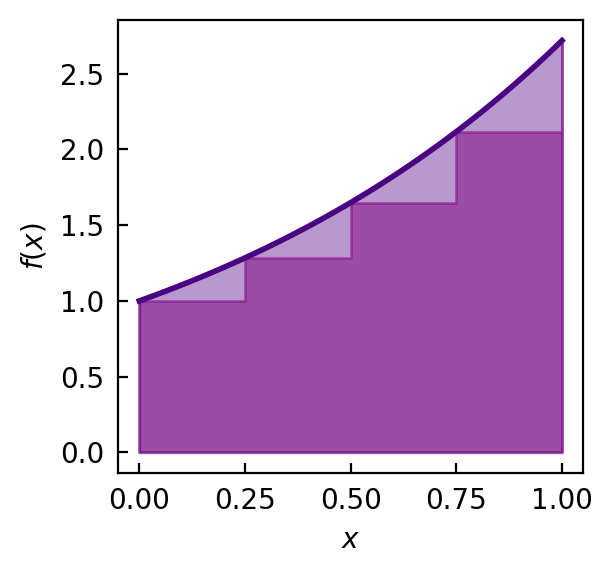

In [11]:
plt.figure(figsize=(3,3)) # define figure
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
xg = np.linspace(a,b,100)
plt.plot(xg, np.exp(xg), lw=2., color='indigo')
plt.fill_between(xg, np.zeros_like(xg), np.exp(xg), color='indigo', alpha=0.4)
plt.fill_between(xir[1:], np.zeros_like(xir[1:]), fxir[:-1], color='purple', alpha=0.5)
plt.show()

We can use a *piecewise-linear* approximation instead, in which subsequence $x_i$ values by a linear function instead of constant.. The approximation of the function is much better. This means that if sum up areas under the trapezoids formed by the vertices at which function is evaluated, we can approximate the integral much better.  This motivates *the trapezoidal* scheme of numerical integration below. 

### <font color='darkblue'>The trapezoidal scheme

The logic of the method called *trapezoidal integration scheme*, in which integrated function is approximated in each interval using a linear function, can be used to get reasonably accurate numerical integral estimate and easiest to remember. 

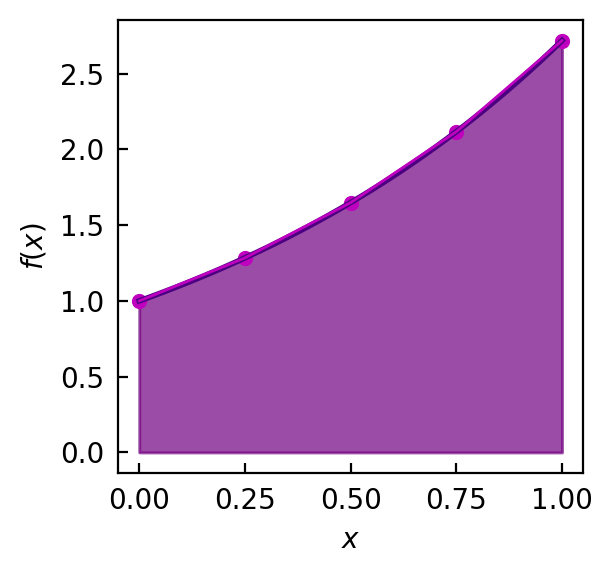

In [15]:

plot_prettier()

plt.figure(figsize=(3,3))
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.fill_between(xg, np.zeros_like(xg), np.exp(xg), color='indigo', alpha=0.4)
plt.fill_between(xi, np.zeros_like(xi), np.exp(xi), color='purple', alpha=0.5)
plt.plot(xg, np.exp(xg), lw=2., color='indigo')
plt.plot(xi, np.exp(xi), lw=1., color='m')
plt.scatter(xi, np.exp(xi), s=20., color='m')
plt.show()

Specifically, to evaluate integral of $f(x)$ (area under $f(x)$ for $x\in[a,b]$):

Split the integration interval into $N$ equal-size sub-intervals of size $h=(b-a)/N=x_{i+1}-x_i$. Note that for $N$ intervals, we will need to evaluate the function at $N+1$ points: for example, splitting $[a,b]$ into two sub-intervals requires evaluating the function at three points: $a$, $a+(b-a)/2$, and $b$. 

For convenience, let's denote $f_i = f(x_i)$, $f_{i+1}=f(x_{i+1})$, etc.

Approximate area under $f(x)$ in each interval, $A_i$, of width $h=x_{i+1}-x_i$ can then be approximated by the area $T_i$ of the trapezoid formed by vertices $(x_i, 0)$,  $(x_i, f_i)$, $(x_{i+1}, f_{i+1})$ and $(x_{i+1},0)$:

$$T_i = \frac{1}{2}(f_i + f_{i+1})\, h.$$

The total area under $f(x)$ in the interval $[a,b]$ using $N$ function values ($N-1$ intervals $\rightarrow h=(b-a)/(N-1)$) is then:

$$A = \int\limits_a^b f(x)\, dx = \sum\limits_{i=0}^{N-1} A_i \approx \sum\limits_{i=0}^{N-1} T_i= \frac{h}{2}\sum\limits_{i=0}^{N-1}(f_i + f_{i+1}),$$
$$ = h\left[\frac{1}{2}(f_0 + f_{N-1}) + \sum\limits_{i=1}^{N-2}f_i,\right]$$


Compare to the previous estimate: 


$$\int_a^b f(x) dx\approx \bar{f}(b-a)=\frac{(b-a)}{N}\,\sum\limits_{i=0}^{N-1}f_i = \frac{(b-a)}{N}\,\sum\limits_{i=0}^{N-1}f_i.$$


Let's check integration with an integral for which we know exact value: for example

$$\int\limits _0^{1}e^x\,dx = e-1 $$

In [9]:
def trapzd(func, a, b, nsteps, *args):
    """
    function implementing trapezoidal integration scheme using
    numpy vector operations
    
    Parameters:
    -----------------------------------------------------------
    func: python function object
          function to integrate, must take numpy arrays as input
    a, b: floats
          limits of the integral
    hstep: float - the size of step to use 
    
    args: parameters to be passed for func, if any 
    
    Returns:
    -------------------------------------------------------------
    value of the estimated int^b_a f(x)dx
    """
    assert(nsteps > 0); assert(a < b)
    
    hstep = (b - a) / nsteps
      
    if nsteps == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd, *args))) * hstep

In [146]:
nsteps = 10

a, b, func = 0., 1., np.exp # approximate integral of sin(x) over [0, pi]
hstep = (b - a) / nsteps

# create a grid of evenly spaced x values 
xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 0 to nstep-1
# this line computes the integral using trapezoidal integration 
integral = (0.5*(func(a) + func(b)) + np.sum(func(xd))) * hstep

# compute exact integral and fractional error
fexact = np.exp(b) - np.exp(a)
ferr = integral/fexact - 1. # fractional error 
print('fractional error = {:.4e}'.format(ferr))

fractional error = 8.3319e-04


In [16]:
def trapzd(func, a, b, nsteps, *args):
    assert(nsteps > 0); assert(a < b)
    
    hstep = (b - a) / nsteps
      
    if nsteps == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 1 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd, *args))) * hstep

It is convenient to put this calculation into function that can be used to take integral of any input function. 

$\star$ in <tt>$^\star$args</tt> indicates that what is passed is a *pointer* to memory location of the start of args, not the values of args elements themselves. The trapzd routine simply passes *args to function, which then interprets the content as the input parameters it expects. We don't have to pass anything to <tt>trapzd</tt> as args if function does not require any parameters, but only takes one input - variable on which it depends.

### <font color='darkblue'>accuracy and order of the trapezoidal integration scheme


In [30]:
# integrate exp(x) from a, b - exact integral = exp(b) - exp(a)
a = 0.; b = 1.
nsteps = 1000

trint = trapzd(np.exp, a, b, nsteps)

fexact = np.exp(b) - np.exp(a)
ferr = np.abs(trint/fexact - 1.) # fractional error 
print('fractional error = {:.4e}'.format(ferr))

fractional error = 8.3333e-08


### <font color='darkblue'>Truncation error of the composite trapezoidal integration 

If we now combine the individual areas into total integral (note that $f_0=f(a)$, $f_N=f(b)$, etc.:

$$A = \int\limits_a^b f(x)dx = \sum\limits_{i=0}^{N-1} A_i = \frac{h}{2}\left[f(a)+f(b)\right] + h\sum\limits_{i=1}^{N-1}f_i + \frac{h^2}{12}\,\left[f^{\prime}(a)-f^{\prime}(b)\right] -  \frac{h^4}{720}\,\left[f^{\prime\prime\prime}(a)-f^{\prime\prime\prime}(b)\right]+\mathcal{O}(h^6).
$$

or $A = T(h) +{\rm truncation\ error\ terms\ of\ the\ trapezoidal\ scheme}$. 

### <font color='darkblue'>Practical applications and examples

Let's use it to compute something useful like integral of the following function: 

$$d_c =(1+z)\int\limits_0^z \frac{dx}{E(x)}.$$

where $E(x)=\sqrt{a(1+x)^3+b(1+x)^2+c}$, where $a$, $b$, $c$ are constants. Specific case: $b=1-a-c$.


In [31]:
def dl_func(x, a, b, c):
    return 1.0 / np.sqrt(a*(1.+x)**3 + b*(1.+x)**2 + c)

In [45]:
a, b, c = 0.3, 0., 0.7
args = [a, b, c]

z = 11.09
nsteps = 10000
d_c = (1+z) * trapzd(dl_func, 0., z, nsteps, *args)
print(d_c)

27.263107916590887


Why is this useful? Because if I multiply this number by the speed of light in units of km/s and divide by what's known as the *Hubble constant* in units of km/s/Mpc, $H_0=70$ km/s/Mpc I will get distance $d_L$ to <a href="https://en.wikipedia.org/wiki/List_of_the_most_distant_astronomical_objects">the most distant known galaxy</a> in Megaparsecs (Mpc is short for megaparsec). 

In [46]:
clight = 2.99792458e5 # speed of light in km/s
H0 = 70 # Hubble constant in km/s/Mpc
d_l = d_c * clight / H0

print(f'distance to galaxy at redshift {z:.2f} is {d_l:.2f} Mpc')

distance to galaxy at redshift 11.09 is 116761.06 Mpc


One Megaparsec is million parsecs. One parsec is the distance light travels in about $\approx 3.24$ years and is the amount by which apparent position of a star changes when the Earth moves around the Sun in 6 months time due to change of the location from which we view it.  

How can we check this calculation if we don't know the exact answer?  We can compare to the calculation by a similar function implemented by someone we'd trust. 

<a href="https://www.astropy.org/">Astropy</a> package has a <a href="https://docs.astropy.org/en/stable/_modules/astropy/cosmology/core.html#FLRW">cosmology sub-package</a>, which has many useful functions, including one that computes distance $d_L$.

In [47]:
from astropy.cosmology import LambdaCDM
import astropy.units as u

def d_l_astropy(z, H0, Om0, OmL):
    cosmo = LambdaCDM(H0=H0, Om0=Om0, Ode0=OmL)
    return cosmo.luminosity_distance(z=z) / u.Mpc

In [49]:
Om0 = 0.3; OmL = 0.7; H0 = 70.

d_la = d_l_astropy(z, H0, Om0, OmL)
print('distance_trapezoidal = {:.5f} Mpc; distance_astropy = {:.5f} Mpc'.format(d_l, d_la))

distance_trapezoidal = 116761.05907 Mpc; distance_astropy = 116761.05671 Mpc


Results are close but not identical. Let's recompute integral using more trapezoidal intervals. 

In [274]:
nsteps = 1000
args = [Om0, 1.-Om0-OmL, OmL]
d_c = (1+z) * trapzd(dl_func, 0., z, nsteps, *args)
d_l = d_c * clight / H0
print('distance_trapezoidal = {:.2f} Mpc; distance_astropy = {:.2f} Mpc'.format(d_l, d_la))

distance_trapezoidal = 116761.29 Mpc; distance_astropy = 116761.06 Mpc


Now trapezoidal result matches astropy's function. 

### <font color='darkblue'>Distance modulus of supernovae type Ia stars vs the shift of their spectral lines (redshift)

Comparison of models to data shown in this plot  from <a href="https://ui.adsabs.harvard.edu/abs/2012ApJ...746...85S/abstract">Suzuki et al. 2012</a>, which uses many observational samples of <a href="https://en.wikipedia.org/wiki/Type_Ia_supernova">type Ia supernovae</a>, allows us to learn about the contents of our Universe.

<br>
<center><img width=800 src="https://astro.uchicago.edu/~andrey/classes/a211/img/suzuki_etal12_hubble_diagram.png"></img></center>

### <font color='darkblue'>The distance modulus

The *distance modulus* - the difference of the observed *apparent magnitude* $m$ and *absolute magnitude* $M$ is a function of distance $d_L$ to the object (see <a href="https://drive.google.com/file/d/15xe3tfourEjM0xFhzJhLDxobnOwl34pA/view?usp=sharing">03b_cosmological_distances</a> notebook): 

$$\mu = m - M = 5\log_{10}d_L + 25.$$

where $d_L$ is in Megaparsecs. Let's assume SN Ia are approximate "standard candles so that they all have the same $M\approx\rm const$. 
    
Now we can compute $d_L$ for theoretical model with a given values of its parameters $\Omega_0$, $\Omega_\Lambda$  and compare it to observed $\mu_{\rm SNIa}=m-\rm const$ of supernovae type Ia, as a function of spectral redshift $z$. 

### Supernovae type Ia sample

The data set is from the study of <a href="https://ui.adsabs.harvard.edu/abs/2014A%26A...568A..22B/abstract">Betoule et al. (2014)</a> and can also be downloaded <a href="http://supernovae.in2p3.fr/sdss_snls_jla/ReadMe.html">here</a>.

In [149]:
def read_jla_data(sn_list_name = None):
    """
    read in table with the JLA supernova type Ia sample
    
    Parameters
    ----------
    sn_list_name: str
        path/file name containing the JLA data table in ASCII format
        
    Returns
    -------
    zsn, msn, emsn - numpy float vectors containing 
                       zsn: SNIa redshifts in the CMB frame
                       msn, emsn: apparent B-magnitude and its errors
    """
    zsn, msn, emsn = np.loadtxt(sn_list_name, usecols=(1, 4, 5),  unpack=True)

    return zsn, msn, emsn


In [275]:
# you may need to change slash in the file name below on your system
# read vectors of redshifts, apparent magnitude in B-band, mB, and its uncertainty emB:
zsn, msn, emsn = read_jla_data(sn_list_name = 'https://astro.uchicago.edu/~andrey/classes/a211/data/jla_lcparams.txt')
nsn = np.size(zsn)
print("read sample of %d supernovae..."%(nsn))

read sample of 740 supernovae...


In [280]:
def mu_sn(z, Om0=1.0, OmL=0.0, H0=70, nsteps=1000): 
    Omk = 1. - Om0 - OmL
    # these parameters correspond to mean matter density, mean geometric curvature, and mean "dark energy" density
    args = [Om0, Omk, OmL] 

    # compute distance for each z value in the grid
    d_lz = np.zeros_like(z)
    for i, zd in enumerate(z):
        d_lz[i] = clight / H0 * (1+zd) * trapzd(dl_func, 0., zd, nsteps, *args)

    # return distance modulus as a function of distance using theoretical expression
    return 5.0 * np.log10(d_lz) + 25.0

### Plot model $\mu=5\log_{10}d_L(z)+25$ vs observational $\mu_{\rm SNIa}$ for type Ia supernovae

In [282]:
from codes.plotting import plot_line_points 

# grid of redshift values 
zmin, zmax, nz = 0.01, 2, 100
z = np.linspace(zmin, zmax, nz)
Om0, OmL = 1.0, 0.
mu_model = mu_sn(z, Om0=Om0, OmL=OmL) 
Msn = 0

plot_line_points(z, mu_model, 
                 xlabel=r'$\rm redshift$', ylabel = r'$\mu=m-M=\rm distance\ modulus$',
                 col='orangered', pcol='slateblue',
                 xp=zsn, yp=msn-Msn, eyp=emsn, legend=r'${\rm model}\ d_L(z,\Omega_{\rm m0},\Omega_\Lambda)$', 
                 pmarker='.', psize=0.1, 
                 plegend=r'$\rm JLA\ SNIa\ data$', points=True, figsize=3)# 

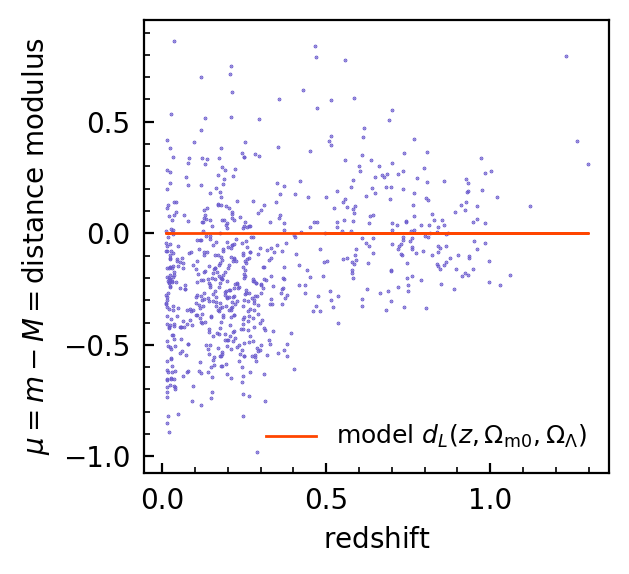

In [204]:
mu_models = mu_sn(zsn, Om0=Om0, OmL=OmL) 

plot_line_points(zsn, np.zeros_like(zsn), 
                 xlabel=r'$\rm redshift$', ylabel = r'$\mu=m-M=\rm distance\ modulus$',
                 col='orangered', pcol='slateblue',
                 xp=zsn, yp=msn-Msn-mu_models, 
                 legend=r'${\rm model}\ d_L(z,\Omega_{\rm m0},\Omega_\Lambda)$', 
                 pmarker='.', psize=0.5,  points=True, figsize=3)

This kind of data and analyses based on calculations of $d_L$ led to discovery that  <a href="https://science.nasa.gov/astrophysics/focus-areas/what-is-dark-energy">dark energy</a> is present in our Universe and drives its accelerated expansion. Three astronomers were awarded Nobel Prize in Physics for this discovery in 2011, although this discovery was made possible by fairly large number of people.

### <font color='darkblue'>Higher order integration schemes?

In [68]:
#the functions below implement the first 3 iterations of Richardson extrapolation 

def r1(func, a, b, nsteps):
    '''
    4th order integration scheme based on the trapezoidal schem using Richardson extrapolation
    estimates integral of function func over the interval [a,b] using steps of size h=(b-a) / nsteps
    '''
    return (4*trapzd(func, a, b, 2*nsteps) - trapzd(func, a, b, nsteps)) / 3

def r2(func, a, b, nsteps):
    '''
    6th order integration scheme based on the trapezoidal schem using Richardson extrapolation
    estimates integral of function func over the interval [a,b] using steps of size h=(b-a) / nsteps
    '''
    return (16*r1(func, a, b, 2*nsteps) - r1(func, a, b, nsteps)) / 15

def r3(func, a, b, nsteps):
    '''
    8th order integration scheme based on the trapezoidal schem using Richardson extrapolation
    estimates integral of function func over the interval [a,b] using steps of size h=(b-a) / nsteps
    '''
    return (64*r2(func, a, b, 2*nsteps) - r2(func, a, b, nsteps)) / 63

In [145]:
# integrate exp(x) from a, b - exact integral = exp(b) - exp(a)
a = 0.; b = 1.
nsteps = 100

trint = trapzd(np.exp, a, b, nsteps)

fexact = np.exp(b) - np.exp(a)
ferr = np.abs(trint/fexact - 1.) # fractional error 
print('fractional error = {:.4e}'.format(ferr))

fractional error = 8.3333e-06


### <font color='darkblue'>Order of the integration schemes

First, let's take a look at how the fractional error of integration changes with the number of intervals (and thus step size) that we use. 

It is convenient to define a "helper" function that integrates function <tt>func</tt> using integration function <tt>int_func</tt> over interval $[a,b]$ for $n_s$ different step sizes so we can see how fractional error changes with step size. 

In [137]:
def compute_integral_steps(func, int_func, a, b, ns, *args):
    nsteps = np.arange(1,ns) # generate a vector of nstep values from 1 to ns-1
    trint = np.zeros(np.shape(nsteps)[0]) # initialize a vector for integration results for each step size

    for i, ns in enumerate(nsteps):
        trint[i] = int_func(func, a, b, 2**nsteps[i], *args) # compute the integral for each step size
     
    return trint, np.abs(b-a)/2**nsteps # return vectors of integration results and step sizes

In [138]:
# integrate exp(x) from a, b - exact integral = exp(b) - exp(a)
a = 0.; b = 1.
ns = 27

trint, hsteps = compute_integral_steps(np.exp, trapzd, a, b, ns)

fexact = np.exp(b) - np.exp(a)
ferr = np.abs(trint/fexact - 1.) # fractional error 

It takes a few seconds to run for $2^{30}$ intervals, but we are getting integral with fractional accuracy of $\approx 3\times 10^{-16}$!

Let's plot the fractional error as a function of step size $h$. 

Another helper function for generic plots that include a line and (optionally) a set of points.

Now let's plot fractional error vs step size $h$. The plot below shows that fractional error increases as square of step size with increasing $h$ (line in the plot shows $\propto h^2$

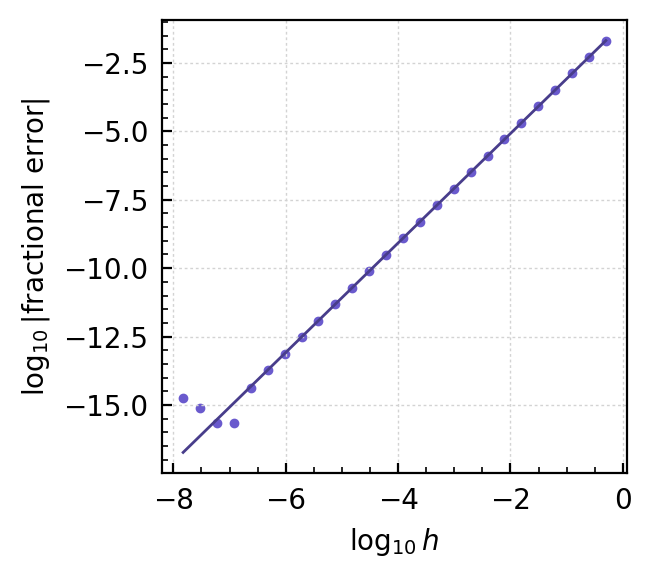

In [140]:
from codes.plotting import plot_line_points

#model is ferr ~ h^2, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr[0] * (hsteps/hsteps[0])**2

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,h$', ylabel = r'$\log_{10}\,\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr), points=True, grid=True, psize=25., figsize=3)

### <font color='darkblue'>The origin of the "floor" in the fractional error at $\approx 10^{-15}-10^{-16}$

In the plot above we can see that fractional error decreases as $\propto h^2$, but at the smallest $h$ values it stops decreasing and actually starts to increase. 

This is because <a href="https://en.wikipedia.org/wiki/Double-precision_floating-point_format">a finite number of bits</a> (64) is used to represent floating point numbers in the <a href="https://en.wikipedia.org/wiki/IEEE_754-2008_revision">IEEE-754</a> standard used in Python and other languages.



In [23]:
import sys
print(sys.float_info)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


The spacing between floating numbers around a floating number $x$ will be $\approx 2\varepsilon\vert x\vert\approx 2.2\times 10^{-16}\vert x\vert$. 

*Some floating point numbers can be represented exactly (if they need $\leq 52$ bits to represent their fraction), while many other need to be* **rounded off.** 

Calculations with numbers that can be represented exactly are more accurate, but rounded off numbers are generic and cannot be avoided. 

This limited representable difference is the source of **roundoff errors** in numerical calculations

We don't have to stop there and can continue this. After $m$ such steps, the new scheme at a step $m+1$ can be formed as 
$$
R_{m+1}(h)=\frac{4^{m+1} R_{m}(h/2)-R_{m}(h)}{4^{m+1}-1}.
$$

where $R_0(h)=T(h)$ is the integral estimate using trapezoidal scheme evaluated with step $h$. This trick is called the Romberg integration method. 


It works by successive cancellation of the leading terms in the truncation errors, as can be seen in the section on Romberg below (optional for undergraduate students). 

This method was proposed for numerical integration by German-Norwegian mathematical physicist <a href="https://en.wikipedia.org/wiki/Werner_Romberg">Werner Romberg</a> (got his PhD in Munich in 1933 working with Arnold Sommerfeld) in 1955, but became popular in 1960s with the spread of computers.  

<center>
<img width=300 src="https://astro.uchicago.edu/~andrey/classes/a211/img/Werner_Romberg.jpg"></img>
Werner Romberg (1909-2003)
</center>

Werner Romberg had an unusual life and career. For political reasons he fled Germany in 1937,
first to Ukraine and then to Norway, where in 1938 he joined the University of Oslo. He spent the war years in
Sweden and then returned to Norway. In 1949 he joined the Norwegian Institute of Technology in Trondheim. He returned to Germany only in 1968, when he took a Professor position at the University of Heidelberg.

### <font color='darkblue'>How to control accuracy of numerical estimate?
    
In general, we do not know what the exact value of the integral, to which we could compare as in the test cases above.
How can we ensure that we calculate integral or derivative with a given fractional or absolute error?

*  We can choose to use a scheme of a given order and keep decreasing $h$ by say halfing it, and stop when fractional or absolute difference between the two estimates is smaller than desired accuracy. 

* We can choose to keep increasing $m$ until the fractional difference between $R_m$ and $R_{m-1}$ ($\vert 1-R_{m-1}/R_m\vert$) becomes smaller than $1/2^{52}$. 

* We may choose to keep increasing $m$ until the absolute difference between $R_m$ and $R_{m-1}$ is smaller than some threshold ($\vert R_{m-1}-R_m\vert<\rm atol$) or fractional difference is smaller than some threshold ($\vert 1-R_{m-1}/R_m\vert<\rm rtol$). 

### SciPy's function <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html"><tt>scipy.integrate.romberg</tt></a> 

implements Romberg's integration method. We will use it in calculations armed with the knowledge of what it actually does. You will have an option to implement Romberg integration in hw 4 assignment. 

In [220]:
from scipy.integrate import romberg

a, b = 0., 1.
aint = romberg(np.exp, a, b)
aexact = np.exp(b) - np.exp(a)
ferr = aint/aexact - 1.

print(f'frac. error = {ferr:.5e}')

frac. error = 1.93179e-14


### <font color='darkblue'>Homework 2
    
* Implement a function that carries out integration of an input function and ensures that an integral is computed with a given fractional or absolute accuracy. 
    
    
* Use your function to reproduce the plot of $\mu_{\rm SNIa}-z$ plot shown in this class. Make sure that the plot has a good size and uses legible, sufficiently large fonts in axes and legend labels, as well as suitable line widths and point size.
    
    
* Extra-credit: implement Romberg integration using recursion

In [61]:
def trapzd(func, a, b, nsteps, *args):
    assert(nsteps > 0); assert(a < b)
    
    hstep = (b - a) / nsteps
      
    if nsteps == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(1,nsteps) * hstep # np.arange creates a vector of values from 1 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd, *args))) * hstep, hstep, 0., 0.

In [65]:
#function to integrate
def f(x):
    return x**2

#actual integral value
def f_integral(x):
    return (1/3)*x**3

#integration function
def integrate(f,a,b,nsteps,middle=True):

    bin_size = (b-a)/nsteps #calculate bin size
    bins = np.arange(a,b+bin_size,bin_size) #bin size -> range
    f_bins = f(bins) #call f on this range

    bar_xs = bins[:-1]+bin_size/2 #So I can plot vs actual curve

    #Caculate average height of trapezoid
    if middle:
        averages = (f_bins[1:] + f_bins[:-1])/2
    else:
        averages = f_bins[:-1]

    return np.sum(averages*bin_size),bin_size,bar_xs,averages #return calculate value,bin size used,and values for plots

def integrate_new(f,a,b,nsteps,middle=True):

    bin_size = (b-a)/nsteps #calculate bin size
    xg = np.linspace(a, b, nsteps)
    return np.average(f(xg))*(b-a),bin_size,bar_xs,averages #return calculate value,bin size used,and values for plots


def get_error(integral_func,f,f_integral,a,b,start=10,end=1000,step=10):

    '''
    Is there a way to do something like this in numpy without a loop?
    i.e. call a function with one of the inputs as an array and then get an array of results?
    '''

    expected = f_integral(b)-f_integral(a) #calculated actual value
    steps = np.arange(start,end,step) #create a range for steps
    ferr = [] #save ferr
    bins = [] #save bins
    for s in steps:
        calculated,bin_size,_,_ = integral_func(f,a,b,s) #call the integrate function
        bins.append(bin_size)
        ferr.append(np.abs(calculated/expected - 1.))
    return steps,np.array(ferr),bins

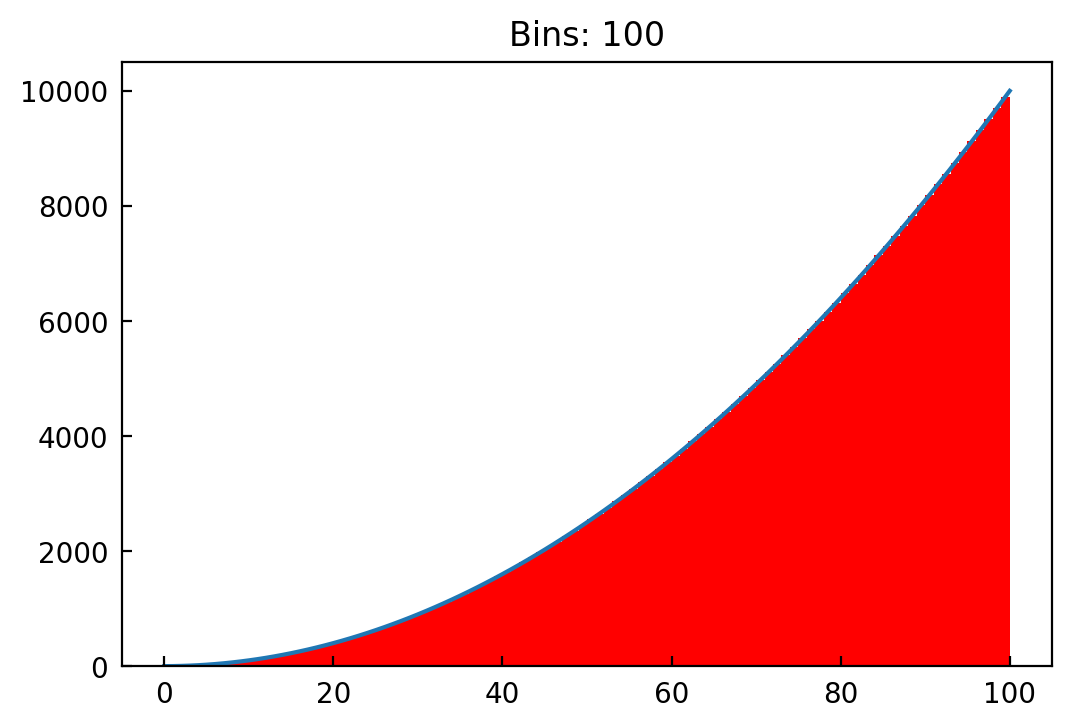

In [52]:
a,b = 0,100
steps = 100
xs = np.arange(a,b+1)
expected = f_integral(b)-f_integral(a)
_,bin_size,bar_xs,averages = integrate(f,a,b,steps)
plt.bar(bar_xs,averages,width=bin_size,color="red",zorder=0)
plt.plot(xs,f(xs),label="curve",zorder=1)
plt.title("Bins: " + str(steps))
plt.show()


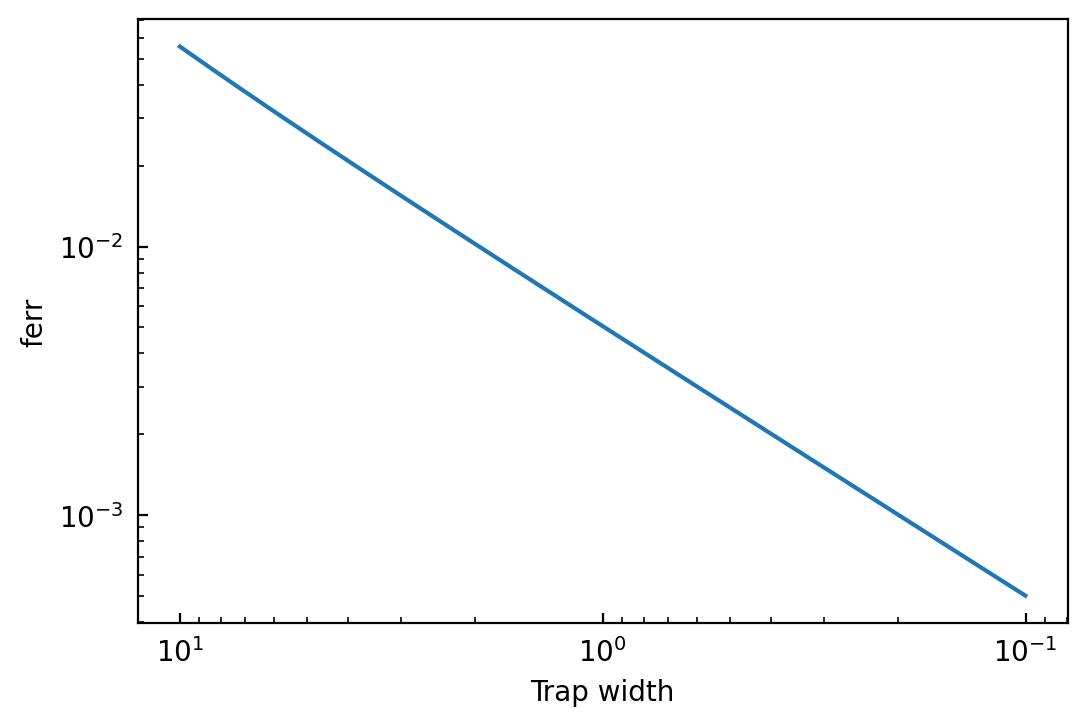

In [67]:
steps,ferr,bins = get_error(integral_func=integrate_new,
                            f=f,
                            f_integral=f_integral,
                            a=0.,
                            b=100., step=1)


#for i, fd in enumerate(ferr):
#    print(f'step = {steps[i]:d}     ferr = {fd:.4e}')

plt.yscale('log')
plt.plot(bins,ferr)
plt.xscale('log')
plt.xlabel("Trap width")
plt.ylabel("ferr")
plt.gca().invert_xaxis()
plt.show()


In [59]:
100/28

3.5714285714285716